In [51]:
# we are going to be analyzing airbnb_listings data from the city of paris france

In [3]:
import pandas as pd
listings = pd.read_csv("Listings.csv", encoding="ISO-8859-1", low_memory=False)

In [5]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [6]:
#looking at the data type of our columns
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15359 entries, 0 to 15358
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   15359 non-null  int64  
 1   name                         15322 non-null  object 
 2   host_id                      15359 non-null  int64  
 3   host_since                   15359 non-null  object 
 4   host_location                15342 non-null  object 
 5   host_response_time           0 non-null      float64
 6   host_response_rate           0 non-null      float64
 7   host_acceptance_rate         4733 non-null   float64
 8   host_is_superhost            15359 non-null  object 
 9   host_total_listings_count    15359 non-null  int64  
 10  host_has_profile_pic         15359 non-null  object 
 11  host_identity_verified       15359 non-null  object 
 12  neighbourhood                15359 non-null  object 
 13  district        

In [9]:
#Casting any date columns as a datetime format

In [7]:
listings["host_since"] = pd.to_datetime(listings["host_since"])
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15359 entries, 0 to 15358
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   15359 non-null  int64         
 1   name                         15322 non-null  object        
 2   host_id                      15359 non-null  int64         
 3   host_since                   15359 non-null  datetime64[ns]
 4   host_location                15342 non-null  object        
 5   host_response_time           0 non-null      float64       
 6   host_response_rate           0 non-null      float64       
 7   host_acceptance_rate         4733 non-null   float64       
 8   host_is_superhost            15359 non-null  object        
 9   host_total_listings_count    15359 non-null  int64         
 10  host_has_profile_pic         15359 non-null  object        
 11  host_identity_verified       15359 non-nu

In [50]:
#Filtering the data to rows where the city is paris, and keep only the columns 'host_since', 'neighbourhood', 'city', 'accommodates', and 'price' 
#in our table

In [12]:
paris_listings = (
    listings
    .query("city == 'Paris'")
    .loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
)
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12429 entries, 0 to 15238
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     12429 non-null  datetime64[ns]
 1   neighbourhood  12429 non-null  object        
 2   city           12429 non-null  object        
 3   accommodates   12429 non-null  float64       
 4   price          12429 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 582.6+ KB


In [13]:
#Checking for missing values, and calculating the minimum, maximum, and average for numeric field

In [14]:
paris_listings.isna().sum()

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

In [15]:
paris_listings.describe()

,host_since,accommodates,price
count,12429,12429.000000,12429.000000
mean,2015-07-06 11:54:08.950036224,3.005069,93.245233
min,2009-10-28 00:00:00,1.000000,8.000000
25%,2014-03-16 00:00:00,2.000000,60.000000
50%,2015-04-24 00:00:00,2.000000,80.000000
75%,2016-06-02 00:00:00,4.000000,100.000000
max,2020-12-08 00:00:00,14.000000,6742.000000
std,NaN,1.301218,92.137753


In [18]:
# Preparing the data for visualization

In [20]:
#Filtering down the most expensive neighbourhood in Paris

In [19]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price": "mean"})
    .sort_values("price")
)
paris_listings_neighbourhood.tail()



,price
neighbourhood,
Palais-Bourbon,119.171103
Hotel-de-Ville,121.579767
Luxembourg,123.788889
Louvre,140.761364
Elysee,142.129032


In [43]:
# This line filters the 'paris_listings' DataFrame to only include rows where the 'neighbourhood' column is equal to 'Elysee'.
# Then, it groups the filtered DataFrame by the 'accommodates' column.
# After grouping, it calculates the mean of the 'price' column for each group (number of accommodates).
# Finally, it sorts the grouped data by the mean price in ascending order.
paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price": "mean"})
    .sort_values("price")
)
# This line displays the first few rows of the 'paris_listings_accommodates' DataFrame.
paris_listings_accommodates.head()   

,price
accommodates,
1.0,56.000000
2.0,97.855422
3.0,112.315789
4.0,138.215686
5.0,241.800000


In [47]:
# This code aggregates Paris Airbnb listings data over time, grouping by the date when hosts joined Airbnb. 
#It calculates the count of listings and the mean price on a yearly basis ('Y'). 
#The resulting DataFrame, 'paris_listings_over_time', provides insights into the evolution of listing count and average price over time.

In [27]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("Y")
    .agg({
        "neighbourhood": "count",
        "price": "mean"


    })
)
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2009-12-31,2,93.000000
2010-12-31,25,112.520000
2011-12-31,196,97.081633
2012-12-31,742,90.621294
2013-12-31,1730,92.593642


In [48]:
# This code plots a horizontal bar chart to visualize the average listing price by neighbourhood in Paris.

# The 'paris_listings_neighbourhood' DataFrame is used for this visualization.

# Each neighbourhood is represented along the y-axis, with the corresponding average listing price per night in Euros shown along the x-axis.

# The plot is titled "Average Listing Price by Paris Neighbourhood" for clarity.

# After plotting, the seaborn function sns.despine() is called to remove the top and right spines from the plot, enhancing its visual clarity.

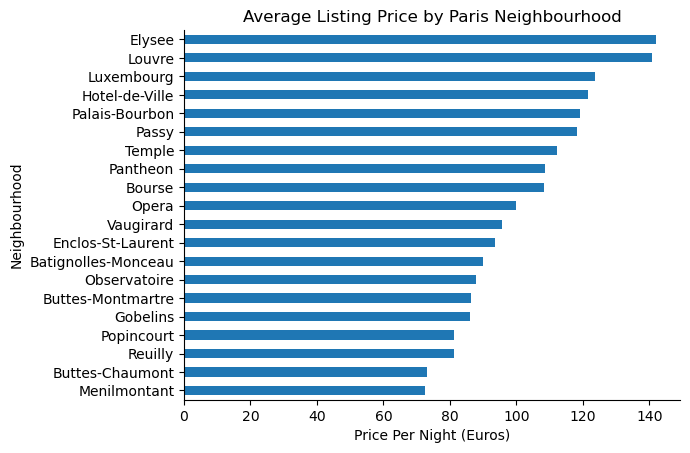

In [32]:
import seaborn as sns
(paris_listings_neighbourhood
 .plot
 .barh(
     title="Average Listing Price by Paris Neighbourhood",
     xlabel="Price Per Night (Euros)",
     ylabel="Neighbourhood",
     legend=None
 )
)
sns.despine()

In [49]:
# This code creates a horizontal bar chart to visualize the average listing price based on accommodation capacity.

# It utilizes the 'paris_listings_accommodates' DataFrame for this purpose.

# Each bar represents a different accommodation capacity, with the corresponding average listing price per night in Euros displayed along the x-axis.

# The plot is titled "Average Listing Price by Accommodation Number" to provide clarity regarding the visualization's theme.

# Additionally, the seaborn function sns.despine() is used to remove the top and right spines from the plot, improving its visual appearance.

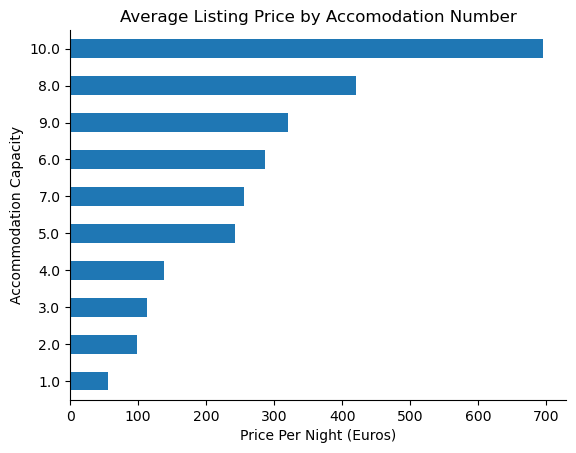

In [34]:
(paris_listings_accommodates
 .plot
 .barh(
     title="Average Listing Price by Accomodation Number",
     xlabel="Price Per Night (Euros)",
     ylabel="Accommodation Capacity",
     legend=None
 )
)
sns.despine()

In [46]:
# This code plots the number of new AirBnB hosts in Paris over time using the 'neighbourhood' column from the 'paris_listings_over_time' DataFrame.

# The plot represents the changes in the count of new hosts across different time intervals.

# The y-axis label is set to "New Hosts" to provide clarity about the data being visualized, and the plot title is defined as "New AirBNB Hosts in Paris Over Time" to convey the overall theme of the visualization.

# After plotting, the sns.despine() function is called to remove the top and right spines from the plot, enhancing its visual clarity.

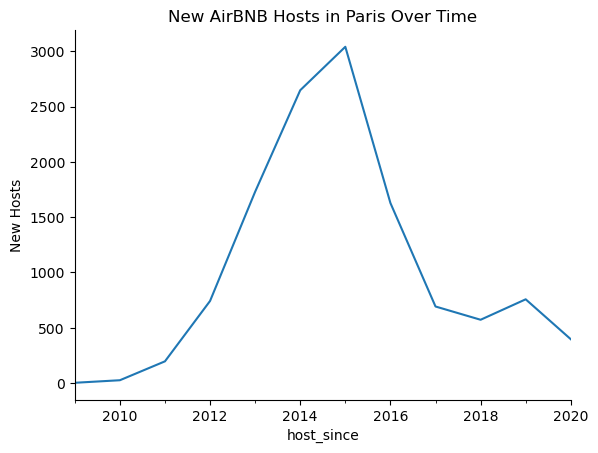

In [36]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    title="New AirBNB Hosts in Paris Over Time"

)    
sns.despine()    

In [45]:
# This code segment plots the average price of AirBnB listings in Paris over time using the 'price' column from the DataFrame 'paris_listings_over_time'.

# It utilizes the .plot() method on the 'price' column, specifying the y-axis label as "Average Price (Euros)" 
#and the plot title as "Average AirBnB Price in Paris Over Time".

# After plotting, it calls sns.despine() to remove the top and right spines from the plot, enhancing its visual clarity.

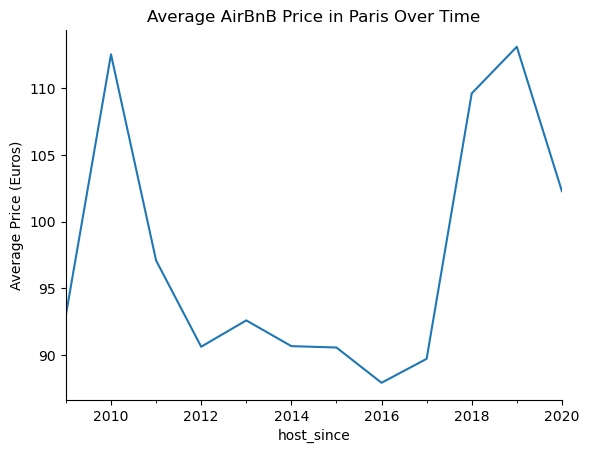

In [37]:
paris_listings_over_time["price"].plot(
    ylabel="Average Price (Euros)",
    title="Average AirBnB Price in Paris Over Time"

)    
sns.despine()  

In [44]:
# This code creates a plot using Matplotlib to show how the number of new hosts and the average price of listings in Paris have changed over time. It's particularly interested in how regulations introduced in 2015 affected these trends.

# By plotting both the number of new hosts and the average price on the same graph with different y-axes, it allows us to see if there's any relationship between these two factors. 

# Essentially, it helps us understand whether changes in regulations impacted the number of new hosts joining Airbnb and how it influenced the average price of listings.

# The plot title "2015 Regulations Lead to Fewer New Hosts, Higher Prices" suggests it's looking for patterns related to the regulatory changes of 2015.

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, Higher Prices')

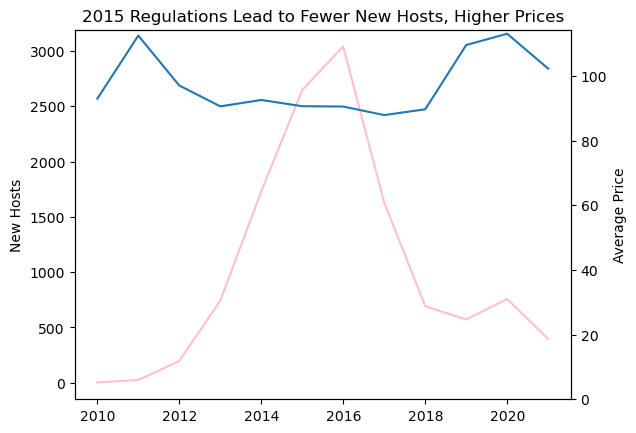

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="pink"
) 
ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price",
  
) 
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")

ax.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")
              